<a href="https://colab.research.google.com/github/12345997/week-7-IP/blob/main/Daniel_Musili_week_7_ip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Defining the question
houses price prediction under certain specifications

#The metric for success
To be able to carry different regression techniques and check out which best fits in predicting the hose prices for the data we are provided with

#Data  Understanding 
*Id

*price  - Price of the house

*bedrooms - Number of Bedrooms

*bathrooms - Number of Bathrooms

*sqft_living - Square feet area of living area

*sqft_lot  - Square feet area of parking Layout

*floors - Number of Floors

*waterfront - Whether waterfront is there or not

*view - Number of Views

*grade - Grades

*sqft_above

*sqft_basement - Square feet area off basement

*yr_built - Year the house is built

*yr_renovated - Year the house is renovated

*zipcode - zipcode os the house

*lat : Latitude of the house

*lon : Longitude of the house

*sqft_living15

*sqft_lot15

#Recording the Experimental Design
> The following steps will be used in our analysis:


*  Importing libraries
* Loading the dataset to our environment
*  Previewing the dataset
*  Preparing the data for analysis
*  Checking for outliers
* Performing Exploratory Data Analysis     
* univariate analysis
* Bivariate analysis
* performing  different regression model





> ## Data Relevance
the dataset is important since it has different customer specifications such as pricee, number of rooms per house, house size, size of the rooms, number of bathrooms whcich are all helpfull in predicting the price of the houses

# 2.Importing the libraries

In [230]:
#importing the libraries
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


# 3.Loading the data

In [231]:
#loading the data in our environment
house_data=pd.read_csv("/content/Independent Project Week 7 - house_data.csv")
house_data.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 4.Previewing the *dataset*

In [232]:
house_data.shape

(21613, 20)

In [233]:
#checking on the columns we have in our dataset
house_data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [234]:
#checking our dataset infomation
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [235]:
#checking the dataset description
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 5.Data preparation

## Validity

In [ ]:
house_data.head()

In [204]:

#Dropping the columns we will not use in our analysis 

house_data.drop(['id','waterfront','view','sqft_basement',"yr_renovated","zipcode",'lat',"long"], axis=1, inplace=True)

#Confirming if the columns have been dropped
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,1800,7503


## Accuracy

In [205]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,3.409430,7.656873,1788.390691,1971.005136,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.650743,1.175459,828.090978,29.373411,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,1900.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,1951.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,1975.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,4.000000,8.000000,2210.000000,1997.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,2015.000000,6210.000000,871200.000000


In [206]:
# Using the mean formula, confirm if the data is accurate
# by calculating the average of the sales and compare with the one shown above
mean = house_data['price'].mean()
print("The average sales in our data is: ", mean)
# The data indeed is accurate

The average sales in our data is:  540182.1587933188


## Completeness

In [207]:
#checking for null values

house_data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
yr_built         0
sqft_living15    0
sqft_lot15       0
dtype: int64

##Consistency

In [208]:
# Checking if our dataset contains any duplicate values
house_data.duplicated().sum()

6

In [209]:
# dropping duplicate values
house_data.drop_duplicates(keep=False,inplace=True)

## Checking for Outliers

In [210]:
# Using the IQR formula
Q1 = house_data.quantile(0.25)
Q3 = house_data.quantile(0.75)
IQR = Q3 - Q1
((house_data < (Q1 - 1.5 * IQR)) | (house_data > (Q3 + 1.5 * IQR))).sum()

price            1139
bedrooms          546
bathrooms         571
sqft_living       572
sqft_lot         2422
floors              0
condition          30
grade            1911
sqft_above        611
yr_built            0
sqft_living15     544
sqft_lot15       2193
dtype: int64

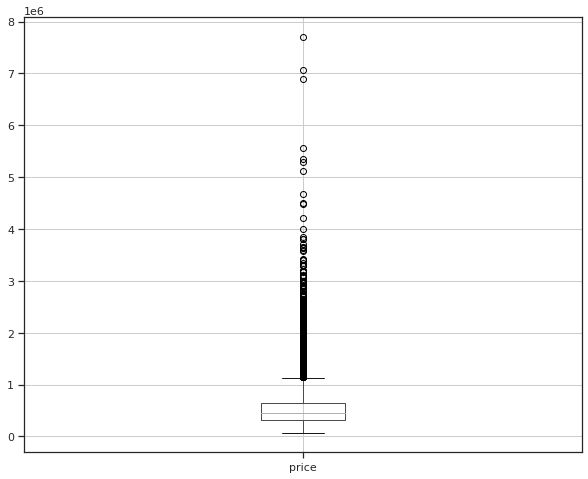

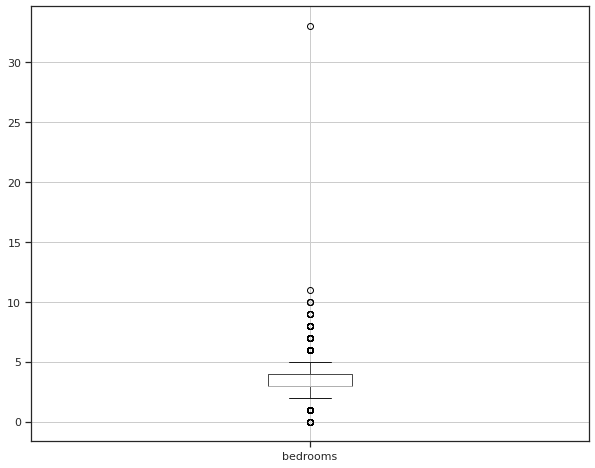

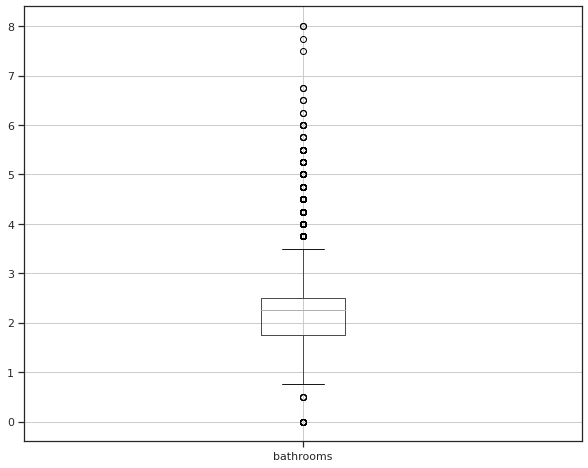

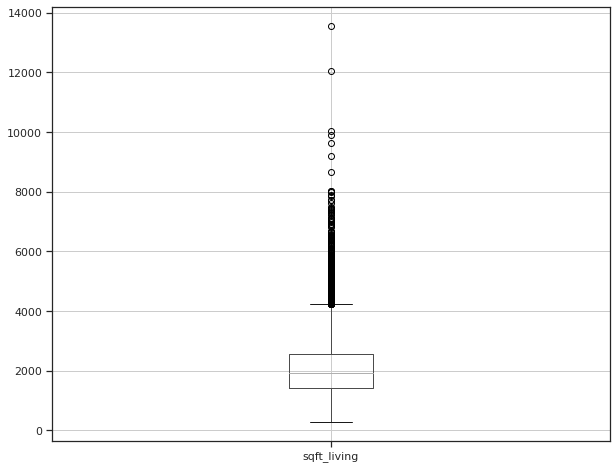

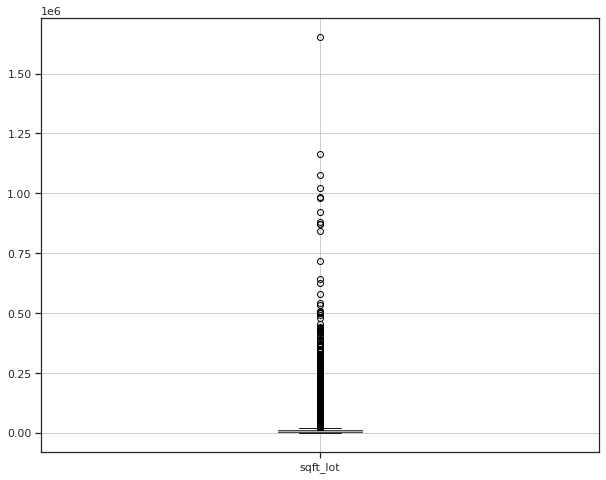

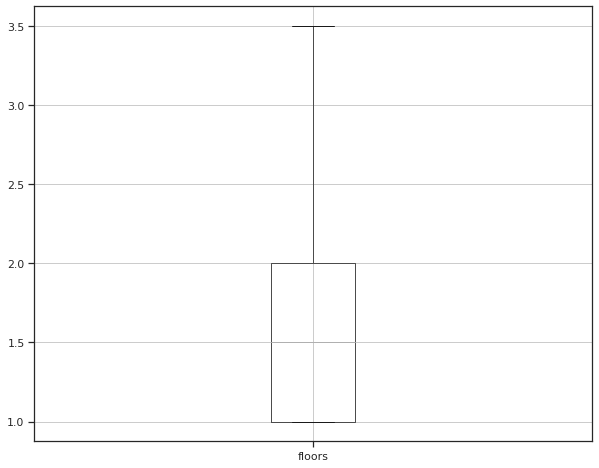

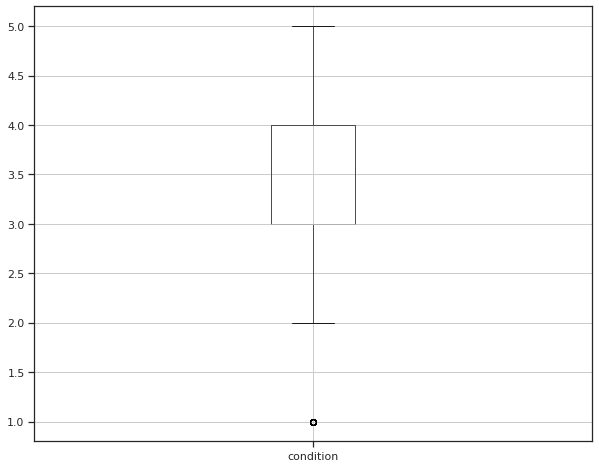

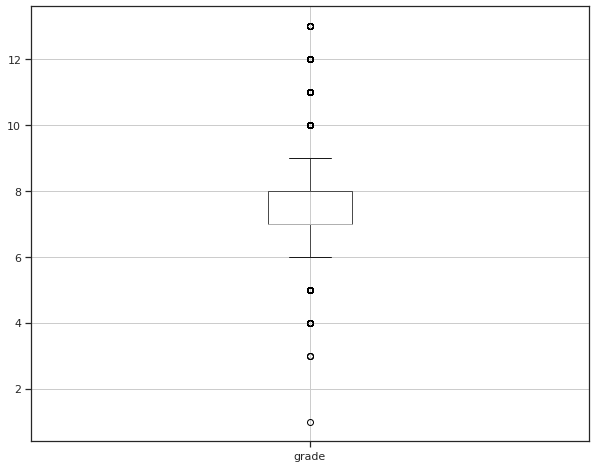

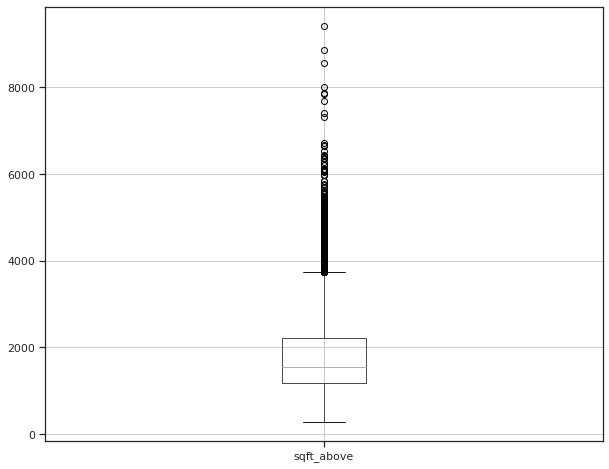

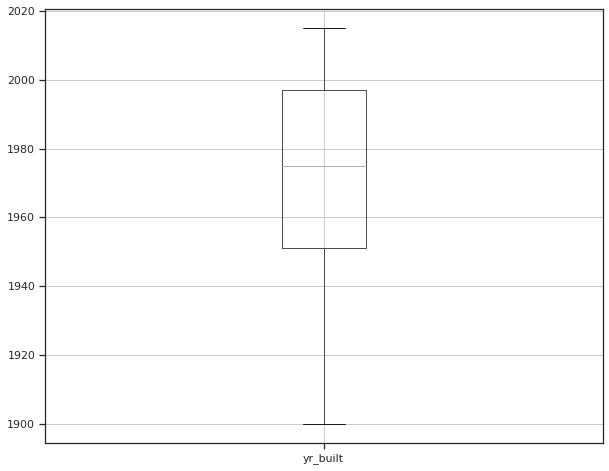

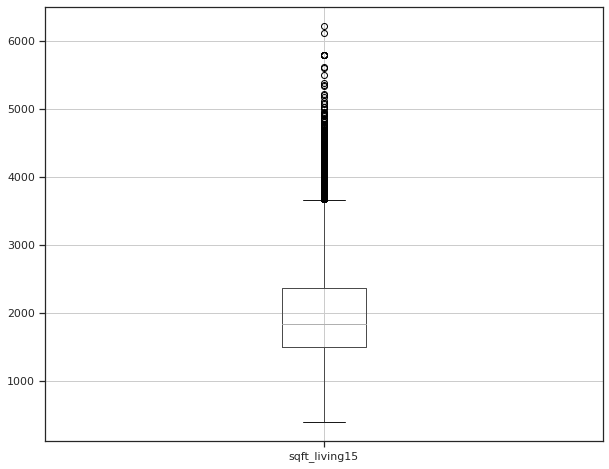

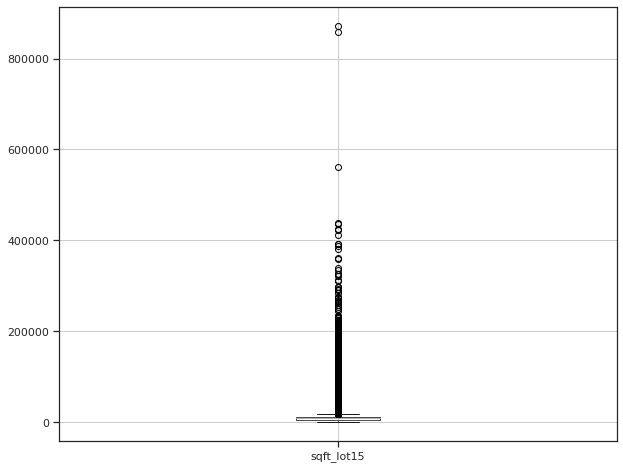

In [211]:

num_cols = house_data.select_dtypes('number').columns

for col in num_cols:
  plt.figure(figsize = (10, 8))
  house_data.boxplot([col])

In [212]:
# Removing outliers
house_data = house_data[~((house_data < (Q1 - 1.5 * IQR)) |(house_data > (Q3 + 1.5 * IQR))).any(axis=1)]
house_data.shape

(16748, 12)

 the ouliers were dropped to bring out to normalise our data

#6.Exploratory analysis

##Univariate analysis

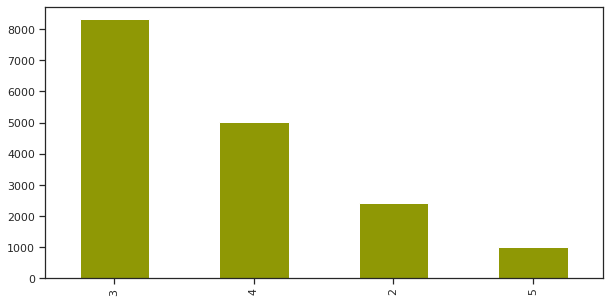

In [213]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize = (10,5))
house_data['bedrooms'].value_counts().plot(kind = 'bar', color = '#8f9805')

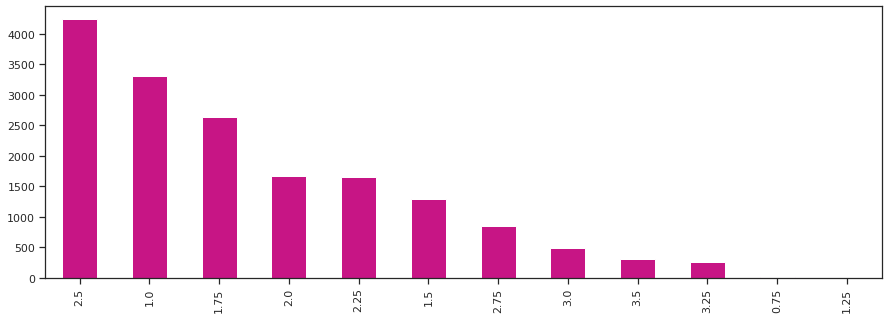

In [214]:
plt.figure(figsize = (15,5))
house_data['bathrooms'].value_counts().plot(kind = 'bar', color = 'mediumvioletred')

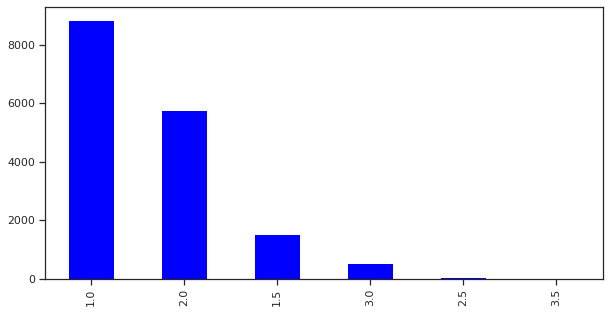

In [215]:

plt.figure(figsize = (10,5))
house_data['floors'].value_counts().plot(kind = 'bar', color = 'blue')

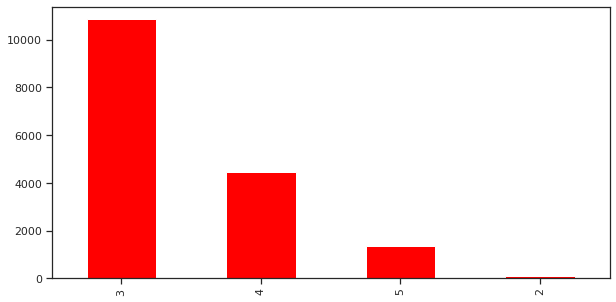

In [216]:
plt.figure(figsize = (10,5))
house_data['condition'].value_counts().plot(kind = 'bar', color = 'red')

Most of the houses owned by the Hass Consultig company are three bedroomed, 2.5 bathrooms,one floor
and one floor.


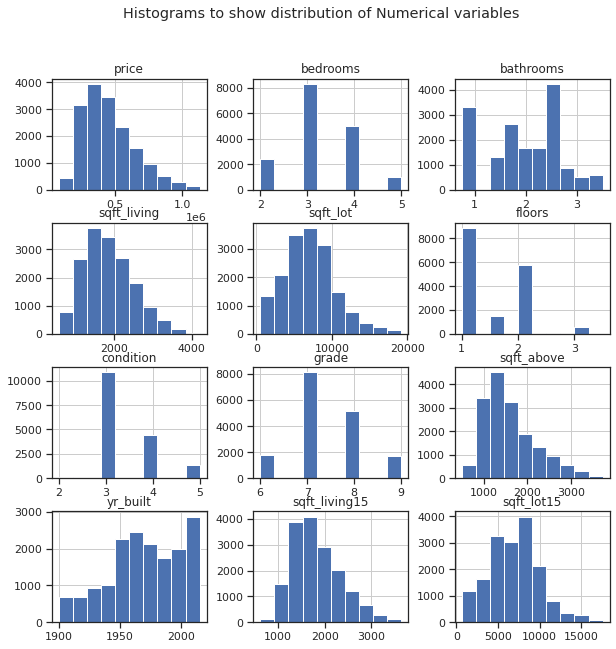

In [217]:
##Checking for data distribution
house_data.hist(bins=10, figsize=(10,10))
plt.suptitle('Histograms to show distribution of Numerical variables')
plt.show()

##histograms

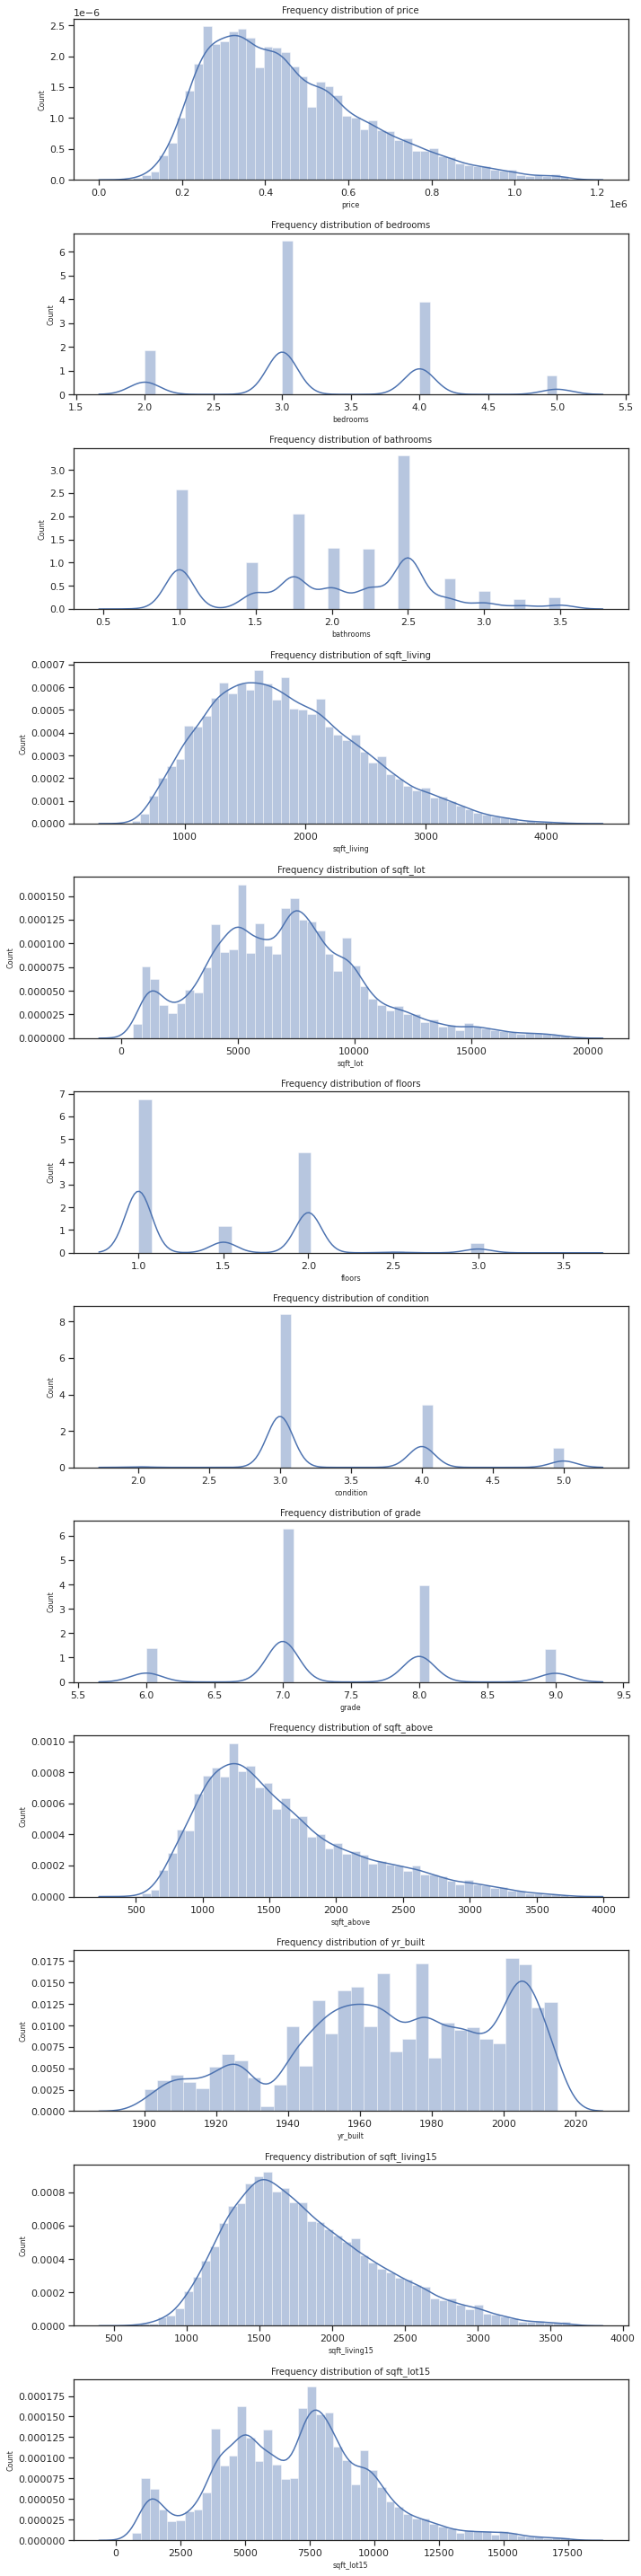

In [218]:
# Plotting distribution of numerical variables
fig, ax = plt.subplots(len(num_cols), figsize=(10,40))

for i, col_val in enumerate(num_cols):

    sns.distplot(house_data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

##Bivariate analysis


###Correlation Plots

In [236]:
house_data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


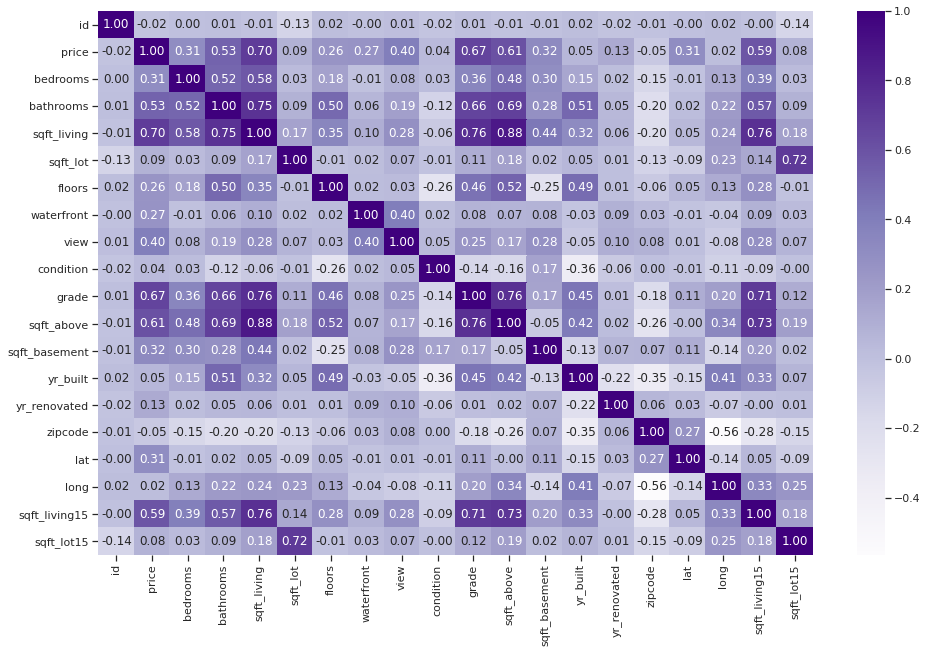

In [237]:
plt.figure(figsize=(16,10))
sns.heatmap(house_data.corr(),annot=True,cmap="Purples",fmt=".2f");
plt.show()



Observations

Using a threshold of 0.5, we observe that:

The price has a high Correlation with: square foot living and the grade
The grade has a high correlation with the number of bathrooms and bedrooms and the Square feet area of living area
The number of floors and the number of bathrooms are highly correlated
The number of bathrooms, the grade and the Square feet area of living area

##Multivariate Analysis

###Checking for multicollinearity

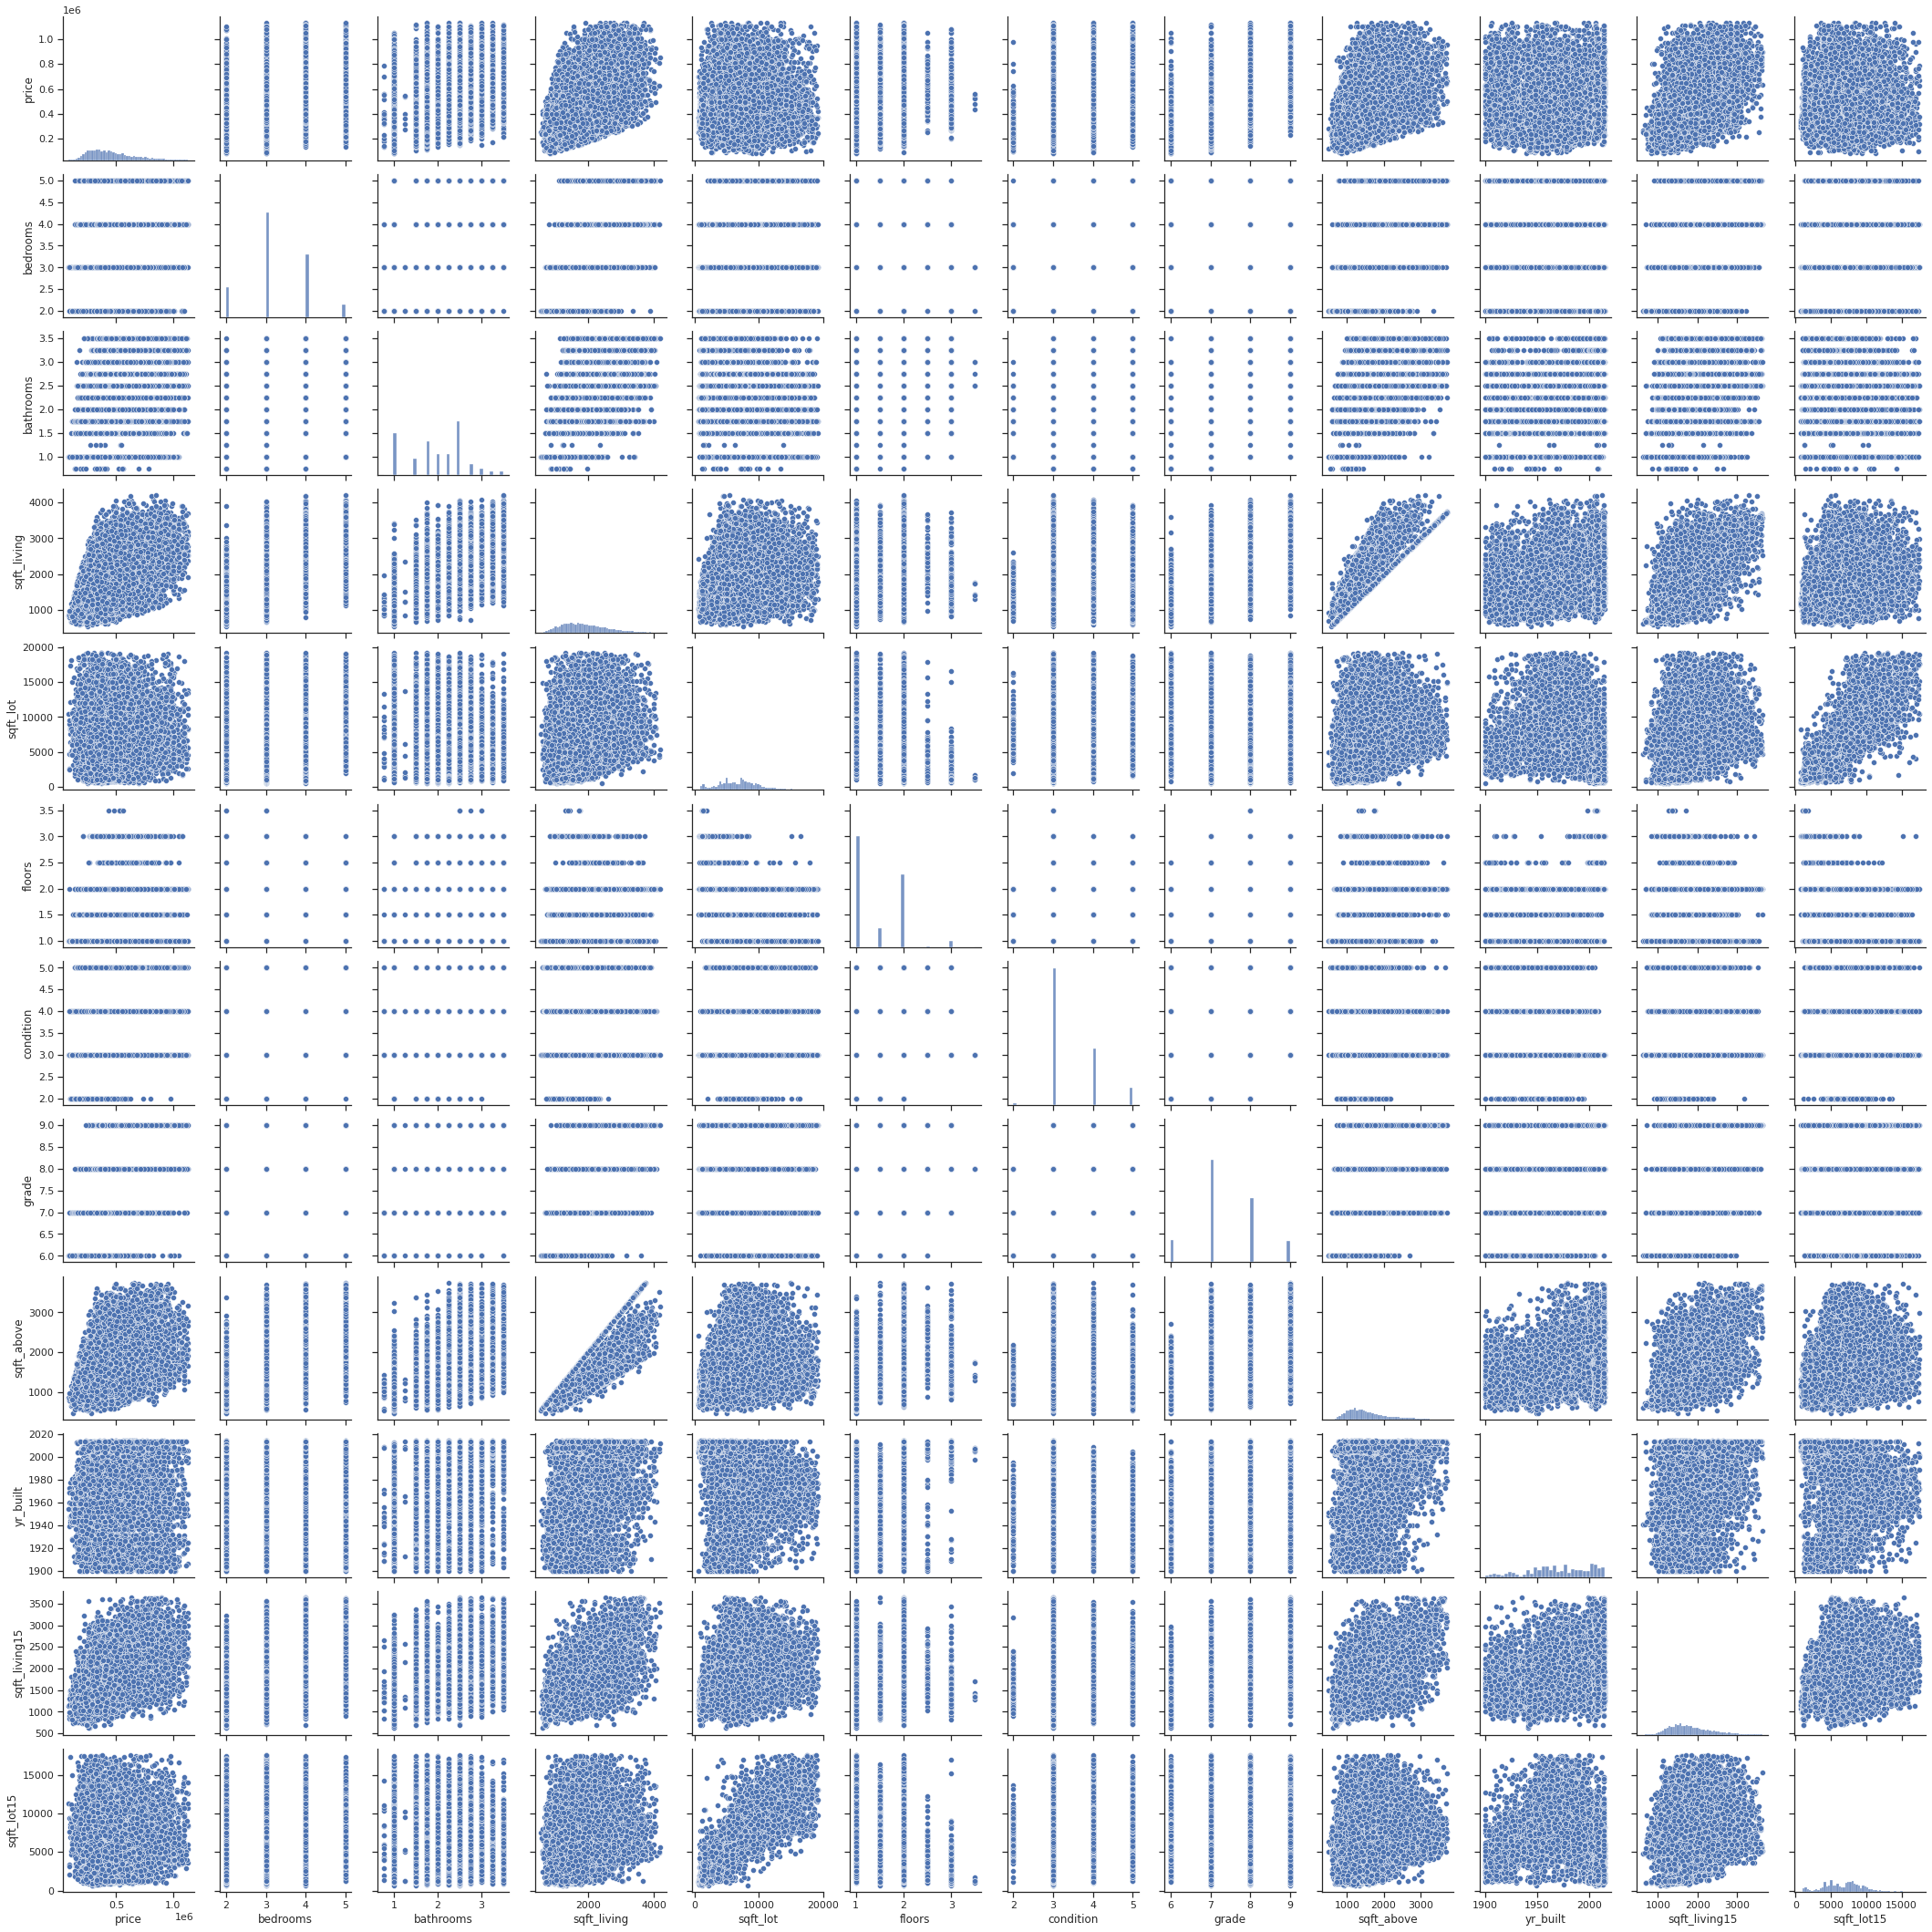

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(house_data)

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy as sp

import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [238]:
#checking the correlation of our dataset
housing = house_data.drop('price', 1)
correlations = housing.corr()
correlations

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
bedrooms,0.001286,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.008130,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [239]:
#carrying out the inverse of the matrix inorder to identify (VIF)
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.028200,-0.000792,-0.002437,2.014288e-02,0.077682,-0.011264,0.007398,-0.034110,0.023650,-0.037991,1.425559e-02,-1.003907e-02,0.016531,0.018585,-0.002548,0.015129,-0.075670,0.010601,0.104517
bedrooms,-0.000792,1.652064,-0.461169,-2.004499e-01,0.049301,0.049703,0.063229,0.114137,-0.050785,0.307078,-7.004514e-01,-3.882648e-01,0.134486,0.045439,0.080114,0.050778,0.017453,0.025205,0.085319
bathrooms,-0.002437,-0.461169,3.350798,-5.095292e+00,-0.024312,-0.675049,0.009743,-0.041564,-0.137076,-0.267915,3.316430e+00,1.375598e+00,-0.935818,-0.259826,0.041802,-0.040992,0.054234,0.092107,0.071224
sqft_living,0.020085,-0.204595,-5.089671,-3.395796e+13,-0.123499,0.522941,0.453211,-0.597904,-0.366076,-0.798601,3.061741e+13,1.636354e+13,1.670379,0.064678,-0.147734,0.023166,-0.123681,-0.987620,-0.184108
sqft_lot,0.077682,0.049301,-0.024312,-1.221495e-01,2.108391,0.044412,0.027869,-0.061575,0.032348,-0.056722,-8.671749e-02,1.630446e-02,0.100011,0.022847,-0.002803,0.054509,-0.138879,0.164745,-1.451422
floors,-0.011264,0.049703,-0.675049,5.304814e-01,0.044412,2.012031,-0.005362,-0.040253,0.089414,-0.230435,-9.816402e-01,3.598059e-01,-0.481661,-0.080807,-0.170738,-0.127803,0.164896,0.272500,0.071513
waterfront,0.007398,0.063229,0.009743,4.542838e-01,0.027869,-0.005362,1.203819,-0.492791,-0.012500,0.048967,-5.214139e-01,-2.225879e-01,-0.020932,-0.065269,0.022533,0.010005,0.026893,0.054528,-0.017718
view,-0.034110,0.114137,-0.041564,-5.999329e-01,-0.061575,-0.040253,-0.492791,1.436291,-0.022259,-0.183976,5.793252e-01,3.261798e-02,0.151071,-0.040853,-0.140595,0.117984,0.074018,-0.325967,-0.010960
condition,0.023650,-0.050785,-0.137076,-3.635494e-01,0.032348,0.089414,-0.012500,-0.022259,1.250019,-0.055328,3.843116e-01,7.766929e-02,0.561930,0.207100,0.161210,0.064022,-0.008769,0.076105,-0.025851
grade,-0.037991,0.307078,-0.267915,-7.929474e-01,-0.056722,-0.230435,0.048967,-0.183976,-0.055328,3.418450,-8.962368e-01,-1.040720e-01,-0.639591,-0.072109,0.083415,-0.331428,0.396630,-0.911994,0.068012


from the data above we find out that sqft_living and sqft_above  had a VIF of 5 thus i had to drop them

In [242]:

# Subsetting the data
X = house_data[['bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']]
y = house_data['price']

y_pred = regressor.predict(X_test)

# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# coefficients for our test set attributes. 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# Making Predictions
# 
from sklearn.metrics import r2_score
from sklearn import metrics

y_pred = regressor.predict(X_test)

print("For the model excluding both sqft_living and sqft_above:")
print("         The R2 score is:", r2_score(y_test, y_pred))
print('         Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

For the model excluding both sqft_living and sqft_above:
         The R2 score is: 0.576174762453006
         Root Mean Squared Error: 248983.22527214934


from the above results the prediction is too off to suggest that the dropped data might have some meaningfull infomation for our prediction

In [243]:

# Subsetting the data
X = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']]
y = house_data['price']

y_pred = regressor.predict(X_test)

# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# coefficients for our test set attributes. 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# Making Predictions
# 
y_pred = regressor.predict(X_test)

print("For the model excluding sqft_above only:")
print("          The R2 score is:", r2_score(y_test, y_pred))
print('          Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

For the model excluding sqft_above only:
          The R2 score is: 0.619108398174917
          Root Mean Squared Error: 236035.52915866804


In [244]:
# This is the version that includes both sqft_above and sqft_living 

# Subsetting the data
X = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']]
y = house_data['price']

y_pred_all = regressor.predict(X_test)

# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size=0.2, random_state=10)

# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_all, y_train_all)

# coefficients for our test set attributes. 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# Making Predictions
# 
y_pred_all = regressor.predict(X_test_all)

print("For the model including both sqft_living and sqft_above:")
print("           The R2 score is:", r2_score(y_test, y_pred))
print('           Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

For the model including both sqft_living and sqft_above:
           The R2 score is: 0.619108398174917
           Root Mean Squared Error: 236035.52915866804


from the two models the differnce isn't too big hence both including and excluding some data
this shows the two variables though being multicollinear doesn't much affect our model alot

### residual plots and heteroscedasticity test

In [245]:

# Splitting our data into training and test sets

X = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = house_data['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [246]:
# Fitting our training data in our model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [247]:
# This is our prediction for price based on our model
y_predict = a = regressor.predict(X_test)

# We create the residual by substracting the test value from the predicted value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

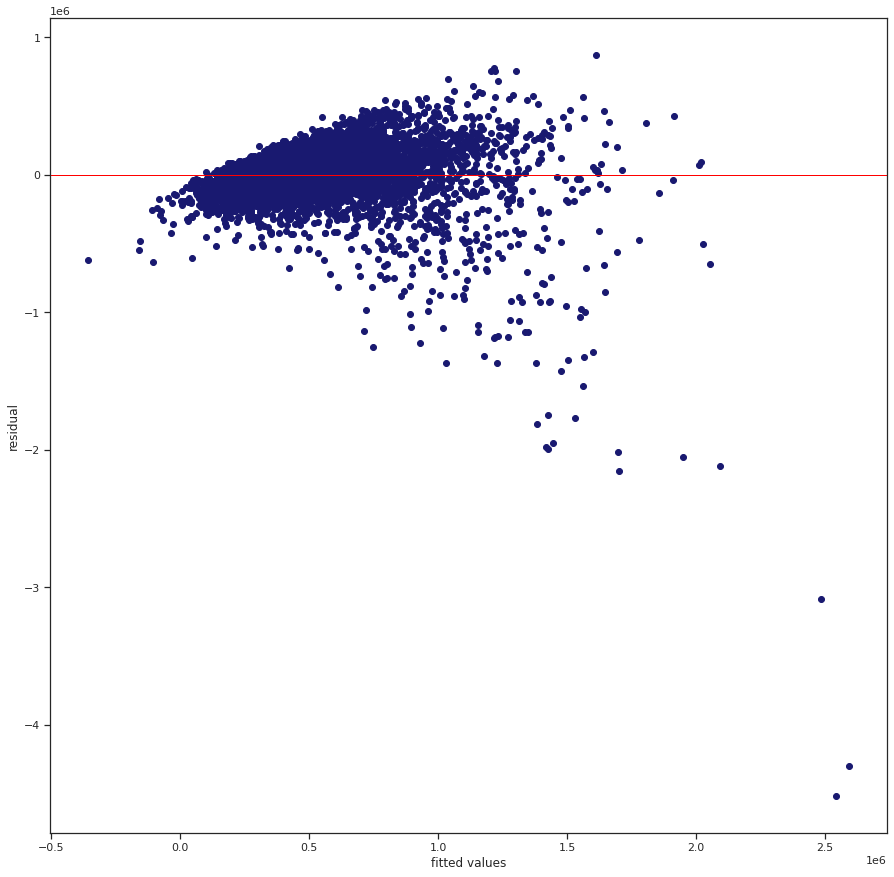

In [248]:
#visualising the residual plot

import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))
plt.scatter(y_predict, residuals, color='midnightblue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

the residuals are closely scatered around the zero value for the whole range, this indicates that the model prediction are averagely correct

### Barlett' Test of Heteroscedasticity


In [254]:


test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# We compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print("The critical value is:", critical_value)

# If the test_result is greater than the critical value, then
# this would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed.')
else:
  print('The variances are homogeneous.')

The critical value is: inf
The variances are homogeneous.


In [255]:
# This is our prediction for price based on our model
y_predict = regressor.predict(X_test)

# The R2 score and RMSE for the linear model is 

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

from sklearn.metrics import r2_score

linear_R2 = a = r2_score(y_test, y_predict)
print("The R2 score for the linear model is:", linear_R2)

Root Mean Squared Error: 229371.4751062196
The R2 score for the linear model is: 0.6172641844470771


#7.Performing Regression models

###Quantile Regression

In [281]:
# Splitting our data into training and test sets

X = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = house_data['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [282]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile

import statsmodels.formula.api as smf
mod = smf.quantreg('y ~ X', house_data)
res = mod.fit(q=.5)
res
# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3827
Model:                       QuantReg   Bandwidth:                   2.429e+04
Method:                 Least Squares   Sparsity:                    3.437e+05
Date:                Fri, 28 May 2021   No. Observations:                21613
Time:                        11:12:07   Df Residuals:                    21602
                                        Df Model:                           10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.179e+06   1.02e+05     50.679      0.000    4.98e+06    5.38e+06
X[0]       -2.985e+04   1600.600    -18.647      0.000    -3.3e+04   -2.67e+04
X[1]        3.335e+04   2711.403     12.301      0.000     2.8e+04    3.87e+04
X[2]         101.6232      2.837     35.827      0.0

In [283]:
# This is our prediction for price based on our model
y_predict = res.predict()

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_predict)))
quantile_R2 = b = r2_score(y, y_predict)
print("The R2 score for the elastic model is:", quantile_R2)

Root Mean Squared Error: 238509.9506190047
The R2 score for the elastic model is: 0.5784548566422347


###Ridge regression

In [284]:

# Splitting our data into training and test sets

X = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = house_data['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [285]:
#fitting the data in our model
#
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [286]:
# determining the most appropriate value for the l2 regularization.
 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [287]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the strength of our model 
# 
search.fit(X_train,y_train)
search.best_params_

{'alpha': 0.001}

In [288]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)


print('Ridge model Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Making predictions & checking accuracy using R2 score
c = r2_score(y_test, y_pred)
print("The R2 score for the ridge model is:", c)

Ridge model Root Mean Squared Error: 224587.0331781612
The R2 score for the ridge model is: 0.620801147596358


###Lasso Regression

In [289]:
# Splitting our data into training and test sets

X = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = house_data['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [290]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 

parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')

In [291]:
# Fitting models and getting RMSE

gridlasso.fit(X_train, y_train) 
y_pred = gridlasso.predict(X_test)
d = r2_score(y_test,y_pred)
print("The RMSE for the lasso model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the lasso model is:",d)

The RMSE for the lasso model: 224582.86140872235
The R2 score for the lasso model is: 0.6208152349233856


###Elastic Net Regression

In [294]:
# Splitting our data into training and test sets

X = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = house_data['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [295]:

# Normalizing the data and creating our grid.
# 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [296]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X_train,y_train)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [297]:
# Fitting the model

elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train, y_train)

# Making predictions
#
y_pred = elastic.predict(X_test)
e = r2_score(y_test,y_pred)

# getting RMSE & R2 score
print("The RMSE for the Elastic model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the elastic model is:", e)

The RMSE for the Elastic model: 229786.3803803248
The R2 score for the elastic model is: 0.6158782864614208


In [298]:

# Reviewing the Solution 
# Models vs r2 score.
models = ['multi-linear', 'quantile', 'ridge', 'lasso', 'elastic']
r2_scores = [a,b,c,d,e]
model_results = pd.DataFrame({'Regresion models': models, 'r2_scores': r2_scores})
print(model_results)

print("The mean r2 scores is:", model_results.mean())
#model_results.sort_values(by = 'r2_scores',axis=0,ascending=False)

  Regresion models  r2_scores
0     multi-linear   0.617264
1         quantile   0.578455
2            ridge   0.620801
3            lasso   0.620815
4          elastic   0.615878
The mean r2 scores is: r2_scores    0.610643
dtype: float64


#8.Conclusion
After carryng out data analysis using the 5 regression models above, we see that the difference between the different regression models accuracy scores using r2 scores metric is quite small though with quanrtile regression the accuracy was small.



```
#An average accuracy of 61.399% is not really satisfactory. Thus, further analysis of data needs be done to further improve the model.
```




#9.Challenging the solution


```
# Our average r2_scores = 0.610643. This translates to 61.06% accuracy which is not the best that we can have to come up with a solid marketing and pricing for our client.
```

